## Lecture 6: Dynamic programming and traceback

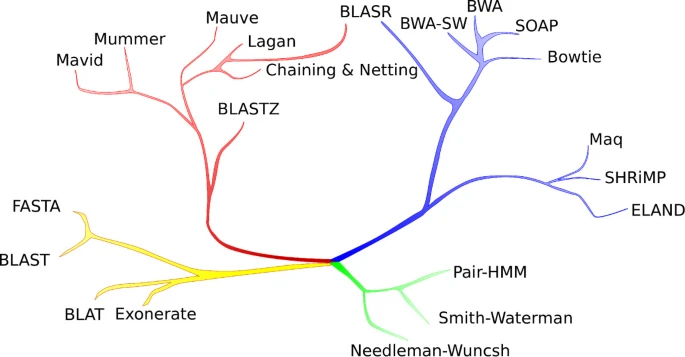
### 2021/05/21

#### Gene 111

## Logistics 

- Homework 4 due tonight

- Homework 5 out today, due Wednesday the 26th

- Homework 3 graded


## Today

- Uses of dynamic programming

- Look back at the dynamic programming approach from last class

- How we extract the sequence alignment from the matrix

- More biologically motivated models

- Looking forward to next week; exposure to HMMs

## Why is this important
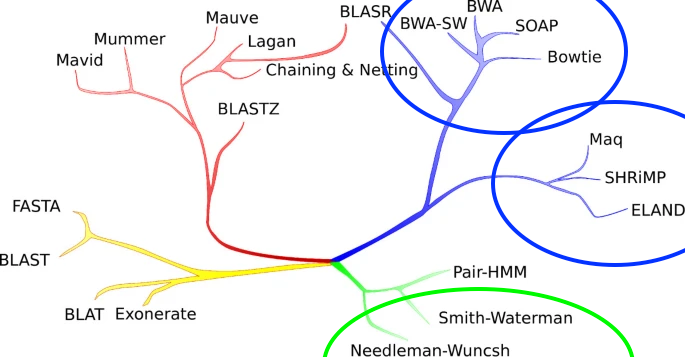

[Source](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-13-238)

### This fits into a bigger picture

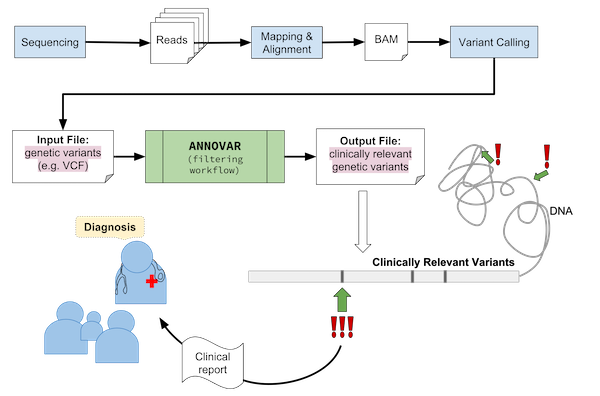

[Source](https://en.wikipedia.org/wiki/ANNOVAR)

## Setup DP matrix from last time

In [62]:

def pretty_print_alignment(seq_A, seq_B, dp_matrix):
    '''
    This function does a lot of justification (ljust and print) to align the sequence and matrix
    We can copy-paste this into future code to help debug what our matrix is doing
    '''
    print("".join([letter_in_B.rjust(6) for letter_in_B in "-" + seq_B]))

    for row_label, row in zip("-" + seq_A, dp_matrix):
        print(row_label + "".join([str(mat_value).rjust(6) for mat_value in row]))



In [9]:
import numpy as np

# old friends
sequence_A = "ATGC-TTA-".replace("-","")
sequence_B = "-TGCATTAA".replace("-","")

our_dp_matrix = np.zeros((len(sequence_A) + 1, len(sequence_B) + 1))

for i in range(0,our_dp_matrix.shape[1]):
    our_dp_matrix[0,i] = i * gap_cost
    
for i in range(0,our_dp_matrix.shape[0]):
    our_dp_matrix[i,0] = i * gap_cost # shifted i and 0 here, rows first
    
pretty_print_alignment(sequence_A,sequence_B,our_dp_matrix)

     -     T     G     C     A     T     T     A     A
-   0.0 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 -80.0
A -10.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
T -20.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
G -30.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
C -40.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
T -50.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
T -60.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
A -70.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0


## Fill in the full matrix

In [64]:
# 3 points
for i in range(1,len(sequence_A)+1): # rows
    
    for j in range(1,len(sequence_B)+1): # columns:
        
        new_value = update_score_with_max(our_dp_matrix[i - 1, j],
                                          our_dp_matrix[i - 1, j - 1],
                                          our_dp_matrix[i, j - 1], 
                                          sequence_A[i - 1], 
                                          sequence_B[j - 1])
        
        # **** uncomment and fill in this line
        # our_dp_matrix[FILL IN MATRIX POSITION HERE] = new_value

## Full score matrix

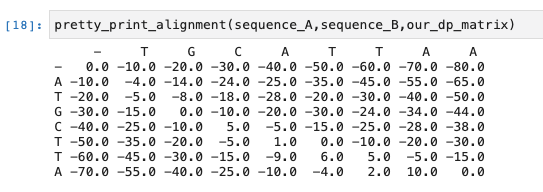


# How do we extract the best scoring path?


In [15]:
sequence_A = "ATGC-TTA-"
sequence_B = "-TGCATTAA"

print("What we know:")
print(sequence_A.replace("-",""))
print(sequence_B.replace("-",""))

print("\nIs this the best alignment?")
print(sequence_A)
print(sequence_B)



What we know:
ATGCTTA
TGCATTAA

Is this the best alignment?
ATGC-TTA-
-TGCATTAA


# How do we extract the best scoring path?


We can already see a high-scoring trajectory though the matrix...

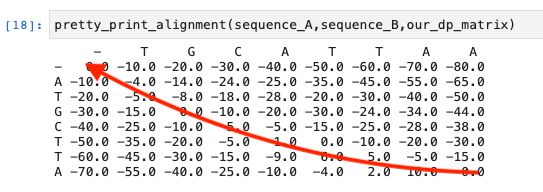

## Think about the structure we made last time

Lets focus on the upper left corner

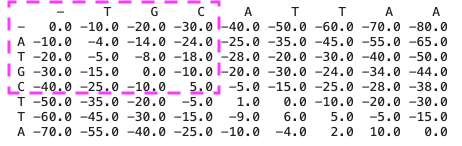

## Now imagine this matrix as a graph

#### We can consider the match, gap left, and gap right as traversing the sequence graph
$
score(i,j) = \max
\begin{cases} 
      score(i-1,j-1) + \text{our match or mismatch score} \\
      score(i-1,j) + \text{gap cost} \\
      score(i,j -1) + \text{gap cost} \\
   \end{cases}
$

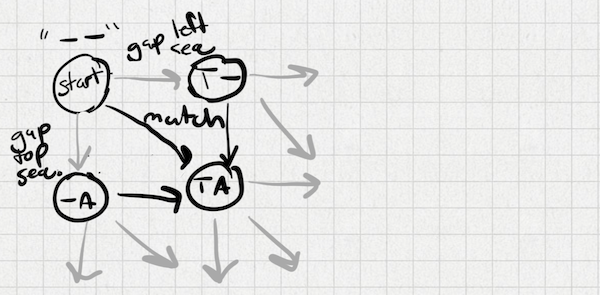

### Directed acyclic graph (DAG) connects sequences into possible alignments



Two points on the graph are connected with a 'best score' traversal, but which one is the best?

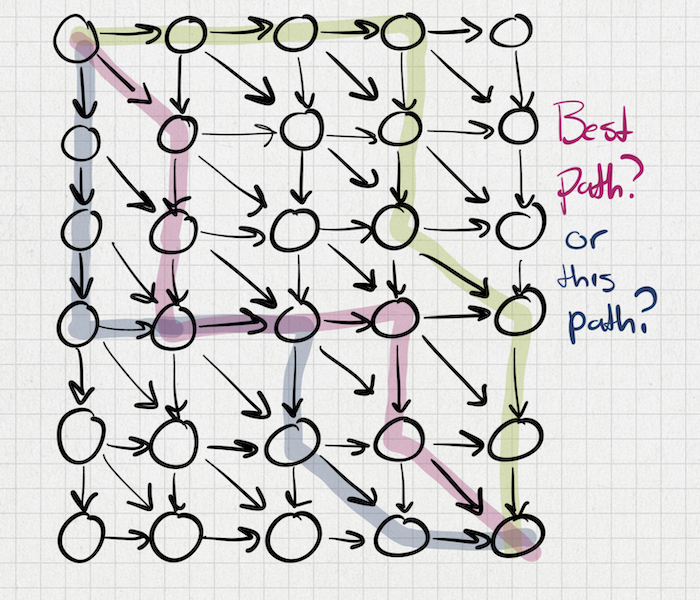

## Traceback process - Global alignment

How do we find the actual alignment? 
- Each square in our matrix contains the best score from the previous step

- We can track where we got the alignment from in a separate matrix

- We can figure out which cell generated this '_best score_' given the scoring parameters



## Traceback with second matrix

- We can track where we got the alignment from in a separate matrix

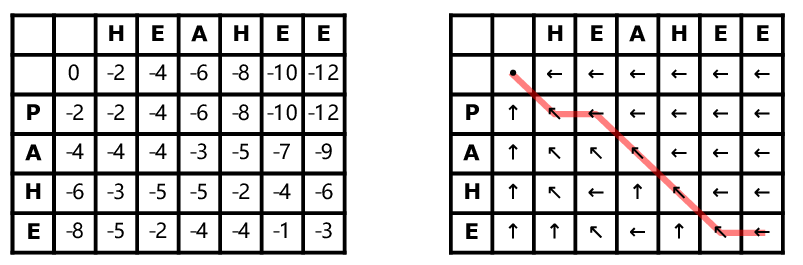


[source](https://www.researchgate.net/figure/Application-of-the-Needleman-Wunsch-algorithm-for-sequences-s1-HEA-HEE-and-s2_fig1_344827979)

## Traceback with second matrix

- We can track where we got the alignment from in a separate matrix as we create our score matrix

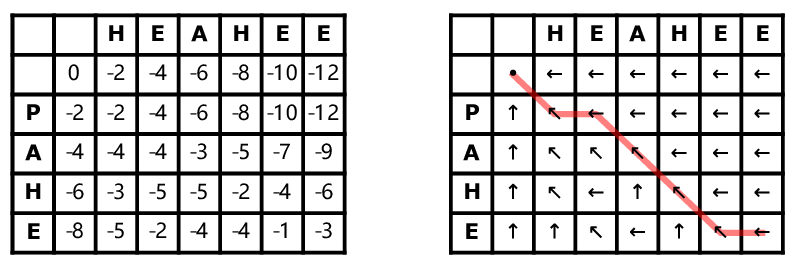


And then use this to walk back through the graph. __Step one: left arrow__
```
E
-
```

## Traceback with second matrix

- We can track where we got the alignment from in a separate matrix

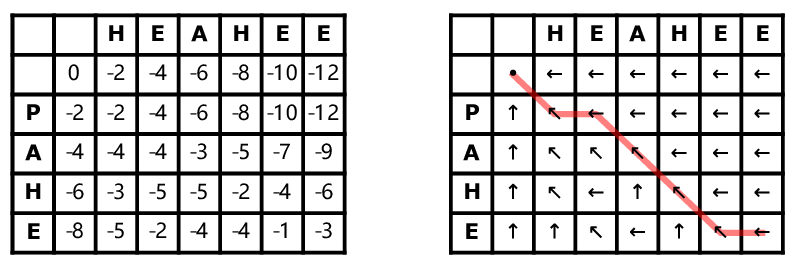

__Step two: diagonal__
```
EE
-E
```

## Traceback with second matrix

- We can track where we got the alignment from in a separate matrix

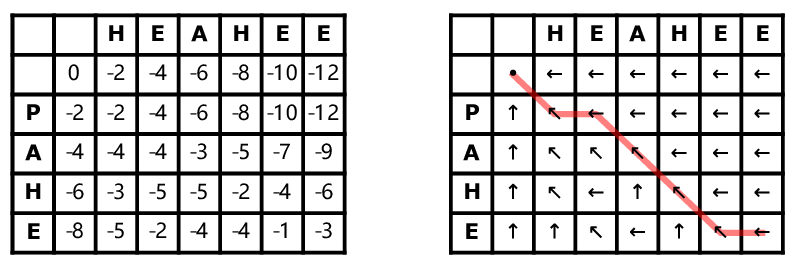

__Step three, and so on...__
```
EEHAEH
-EHA-P
```

## Traceback with second matrix

- We can track where we got the alignment from in a separate matrix

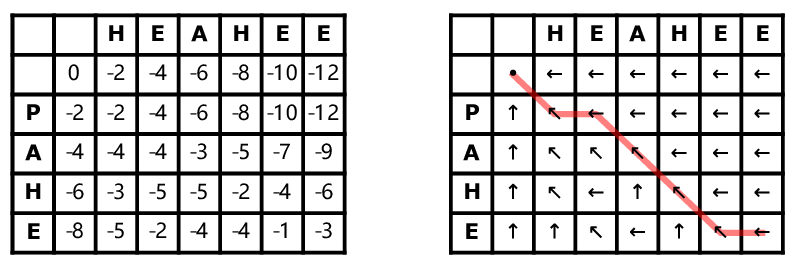

__And reverse the sequences__, as we built them backwards
```
HEAHEE
P-AHE-
```

## We don't actually need the arrow matrix

We can use the scoring scheme we know to determine which cell we used in the alignment. 

$
score(i,j) = \max
\begin{cases} 
      score(i-1,j-1) + \text{our match or mismatch score} \\
      score(i-1,j) + \text{gap cost} \\
      score(i,j -1) + \text{gap cost} \\
   \end{cases}
$

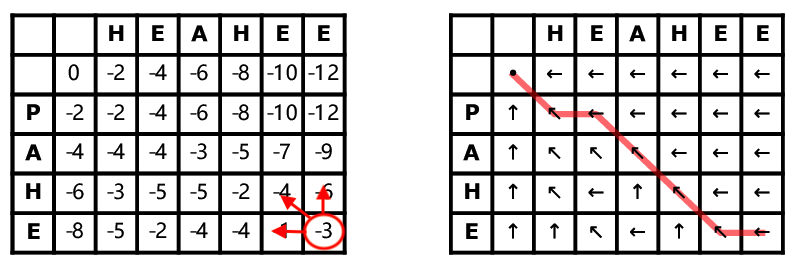

We then move to the source of our high score, and repeat there...

## Homework #5 introduction

Let's load up the matrix we (could have) saved at the end of the last homework...

In [28]:
# how I saved the final matrix:
# np.save("Final_matrix.npy", our_dp_matrix) 

our_dp_matrix = np.load("Final_matrix.npy")

pretty_print_alignment(sequence_A, sequence_B, our_dp_matrix)

     -     T     G     C     A     T     T     A     A
-   0.0 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 -80.0
A -10.0  -4.0 -14.0 -24.0 -25.0 -35.0 -45.0 -55.0 -65.0
T -20.0  -5.0  -8.0 -18.0 -28.0 -20.0 -30.0 -40.0 -50.0
G -30.0 -15.0   0.0 -10.0 -20.0 -30.0 -24.0 -34.0 -44.0
C -40.0 -25.0 -10.0   5.0  -5.0 -15.0 -25.0 -28.0 -38.0
T -50.0 -35.0 -20.0  -5.0   1.0   0.0 -10.0 -20.0 -30.0
T -60.0 -45.0 -30.0 -15.0  -9.0   6.0   5.0  -5.0 -15.0
A -70.0 -55.0 -40.0 -25.0 -10.0  -4.0   2.0  10.0   0.0


## Homework 5 main loop -- setup

In [45]:
# ours scores:
match_score = 5
mismatch_score = -4
gap_score = -10

# cleanup our sequences
sA = "ATGC-TTA-".replace("-","")
sB = "-TGCATTAA".replace("-","")


## Homework 5 main loop

In [65]:
irow = our_dp_matrix.shape[0] - 1
icol = our_dp_matrix.shape[1] - 1

resulting_alignment_A = ""
resulting_alignment_B = ""

m = our_dp_matrix # rename to make slide compact

while irow > 0 and icol > 0:
    mm_score = match_score if sA[irow - 1] == sB[icol - 1] else mismatch_score
        
    if m[irow,icol] == m[irow - 1,icol - 1] + mm_score:
        resulting_alignment_A += #
        resulting_alignment_B += #
        irow -= 1
        icol -= 1
    elif m[irow,icol] == m[irow,icol - 1] + gap_score:
        resulting_alignment_A += #
        resulting_alignment_B += #
        icol -= 1
    elif m[irow,icol] == m[irow - 1,icol] + gap_score:
        resulting_alignment_A += #
        resulting_alignment_B += #
        irow -= 1  
    else:
        raise NameError("We couldn't find the source!!!")


## What did we get?


In [66]:

print("Traversal: ")
print(resulting_alignment_A)
print(resulting_alignment_B)

print("\nIn reverse: ")
print(resulting_alignment_A[::-1]) # explain syntax..
print(resulting_alignment_B[::-1]) # [start:stop:step]

Traversal: 
A-TT-CGT
AATTACGT

In reverse: 
TGC-TT-A
TGCATTAA


### What's missing?

In [58]:
print(sA)
print(sB)

print("\nIn reverse: ")
print(resulting_alignment_A[::-1]) # explain syntax..
print(resulting_alignment_B[::-1]) # [start:stop:step]

ATGCTTA
TGCATTAA

In reverse: 
TGC-TT-A
TGCATTAA


### Get those last aligned bases

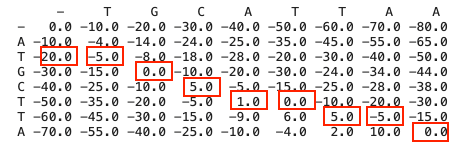

We crashed...

### Get those last aligned bases


In [59]:
while irow > 0:
    resulting_alignment_A += #
    resulting_alignment_B += #
    irow -= 1
    
while icol > 0:
    resulting_alignment_A += #
    resulting_alignment_B += #
    icol -= 1

In [61]:
# The full global alignment
print(resulting_alignment_A[::-1]) # explain syntax..
print(resulting_alignment_B[::-1]) # [start:stop:step]

ATGC-TT-A
-TGCATTAA


## Local alignment - What if we don't want end-to-end alignment?

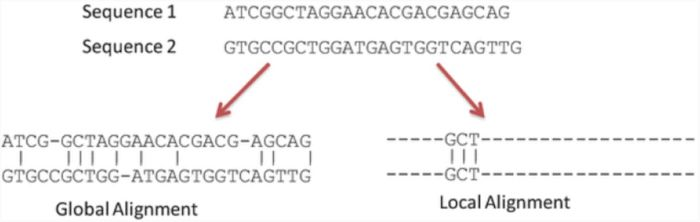

[Source](https://www.biorxiv.org/content/10.1101/401851v2.full)

## Local alignment

Often we don't want the global alignment, we want to find the best partial alignment

##### Slight adjustment to the scoring scheme:



$
score(i,j) = \max
\begin{cases} 
      0 \\
      score(i-1,j-1) + \text{our match or mismatch score} \\
      score(i-1,j) + \text{gap cost} \\
      score(i,j -1) + \text{gap cost} \\
   \end{cases}
$

## Now we fill in the matrix like we did before

with this new updated scoring scheme..

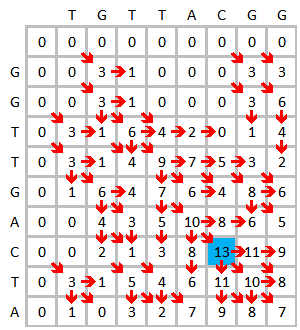

[wikipedia](https://en.wikipedia.org/wiki/Smith%E2%80%93Waterman_algorithm)

## and instead of starting at the final pair...

We find the largest score in the matrix 

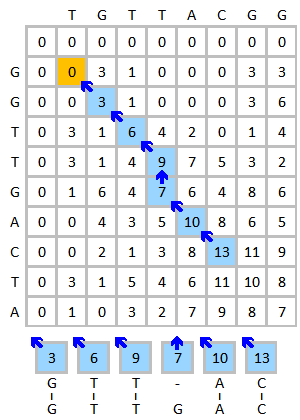


## Dynamic programming 

- Offers a fast approach for finding maximal solutions to sequence alignment

- Still slow (~O(nm)) but the core of a huge number of computational tools

- Lots of optimizations: 
    
    - Software: banded alignment, wavefront, SSD
        
    - Hardware: GPUs, FPGAs
        
- We still have to pick our sequence alignment score model...

- Next week
